### QED-C Benchmarks - Qiskit - Hydrogen Lattice - Extras

The notebook contains additional examples specific to this benchmark program.

In [4]:
min_qubits=2
max_qubits=8
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub=""; group=""; project=""
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBM Quantum hardware, run this once to authenticate
# from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account('YOUR_API_TOKEN_HERE')  # only need to do this first time

# # *** If you use `ibm_quantum` channel, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** If you use `ibm_cloud` channel, set hub, group, and project name here
# hub=""; group=""; project="Cloud Resource Name (CRN) or service name"

# *** This example shows how to specify an IBMQ backend using a known "backend_id"
#     See the App-Oriented Benchmarks setup page documentation for more info ob backends and options. 
# exec_options = {
#     "use_ibm_quantum_platform": False,
#     "use_sessions": False,
# }
# backend_id="ibm_kyiv"

# # ==========================
# The remaining examples create a provider instance and get a backend from it

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"


### Load Data From File and Regenerate Plots

This cell can be used to re-load the data stored during benchmark execution and plot the results.
Be sure to first execute the initial cell which sets the backend_id, or set it here.

This example illustrates configuration options for the plots that are generated.

... execution starting at Jan 24, 2026 14:21:56 UTC
Loading from width_8_instance_1.json, corresponding to 8 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 44, 0.195
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 26, 0.348, 32.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.007, 0.205, 0.021 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0, 0

Loading from width_2_instance_1.json, corresponding to 2 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.146, 0.009 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001

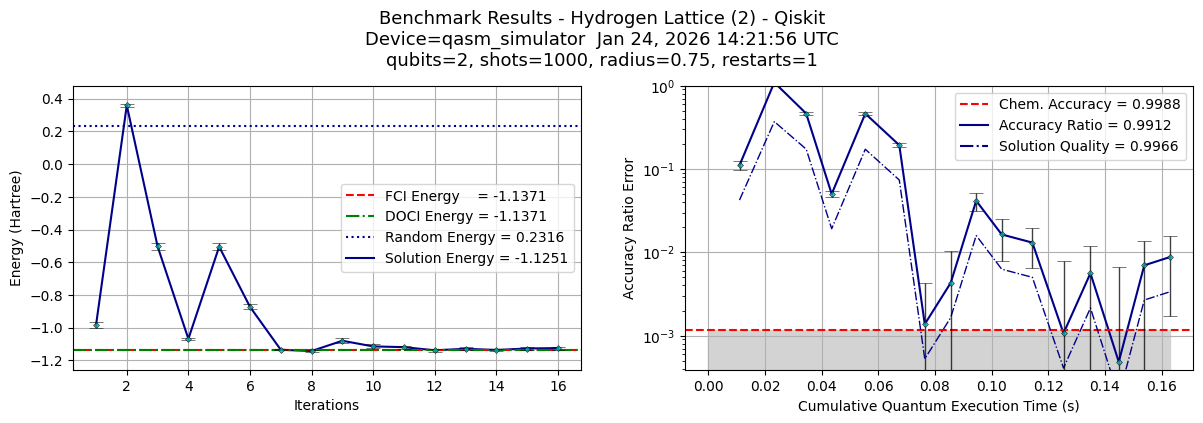

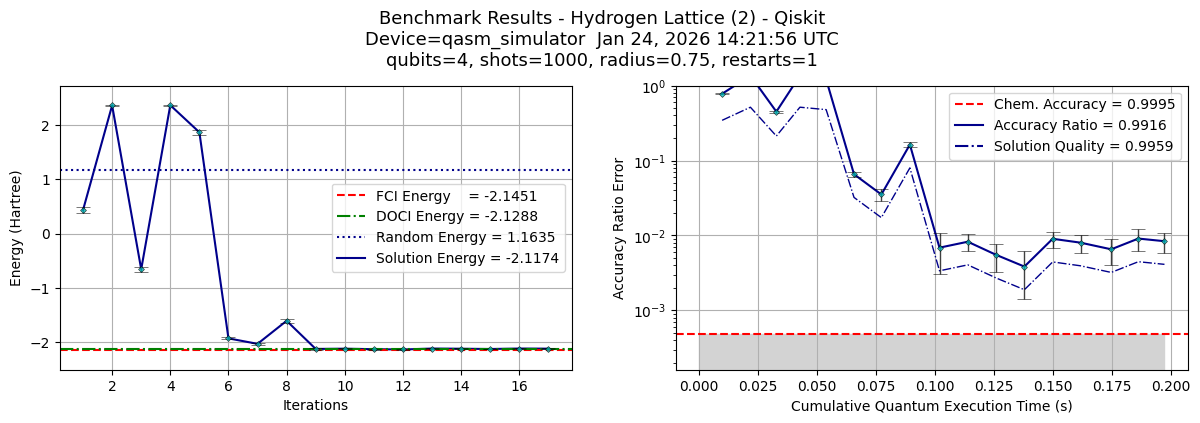

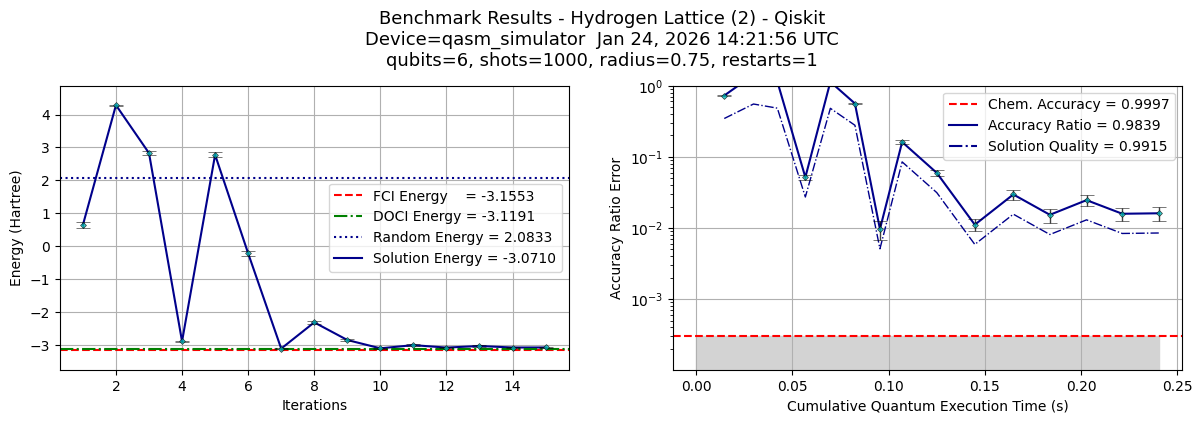

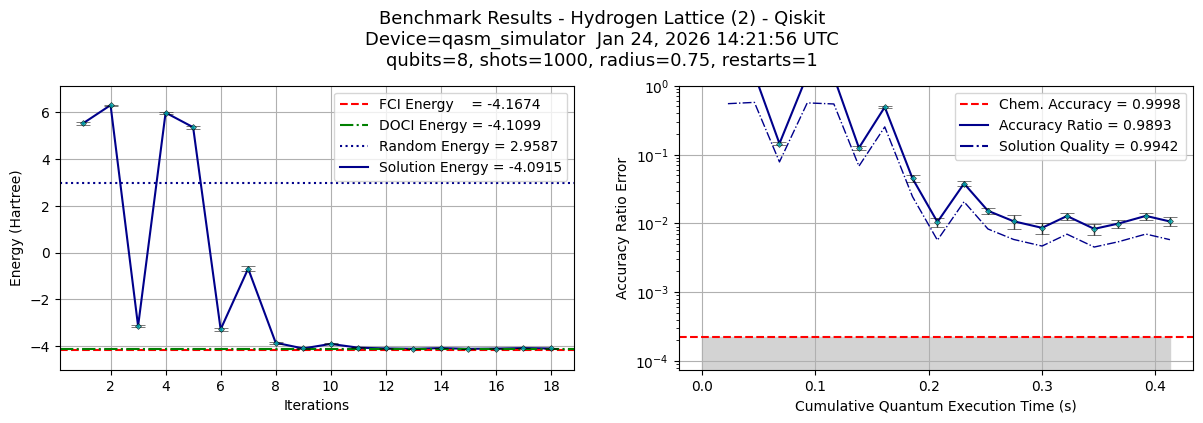

----- Cumulative Plots for all qubit groups -----


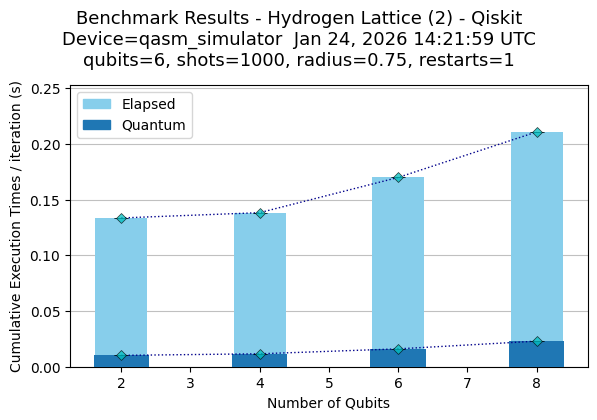

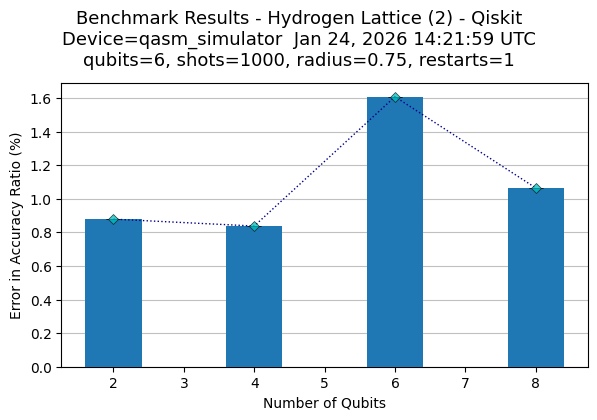

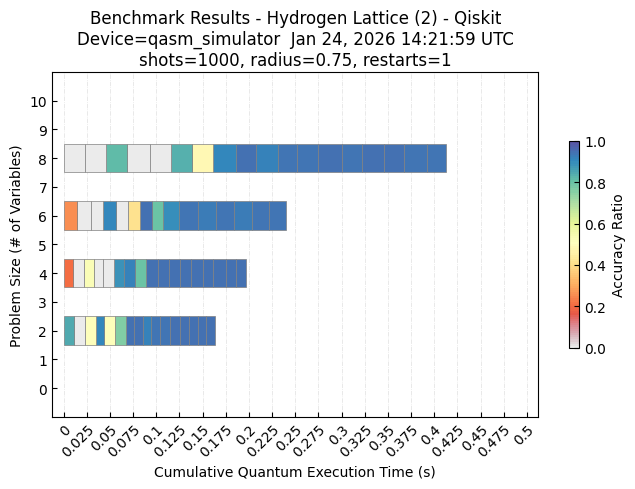

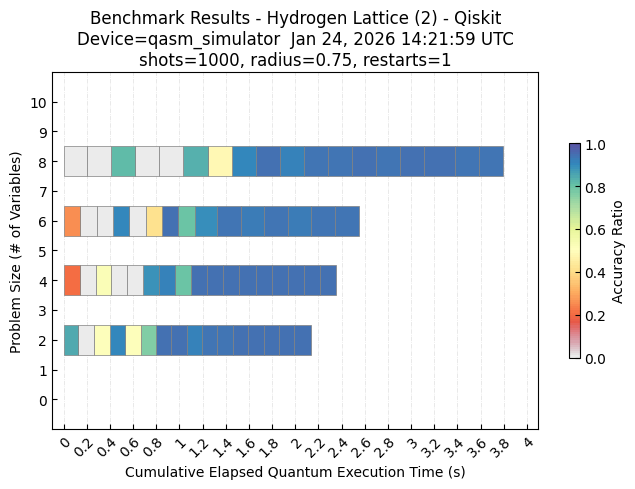

In [5]:
import os, hydrogen_lattice_benchmark

#backend_id="qasm_simulator"

# Additional arguments specific to Hydrogen Lattice benchmark method 2 plotting
hl_app_args = dict(
    
    # display options for line plots (pairwise)
    line_y_metrics=['energy', 'accuracy_ratio_error'],             # + 'solution_quality', 'accuracy_ratio', 'solution_quality_error'
    line_x_metrics=['iteration_count', 'cumulative_exec_time'],    # + 'cumulative_elapsed_time'
    plot_layout_style='grid',                                      # plot layout, can be 'grid', 'stacked', or 'individual'
    
    # display options for bar plots (exec time, accuracy ratio)
    bar_y_metrics=["average_exec_times", "accuracy_ratio_error"],
    bar_x_metrics=["num_qubits"],
    use_logscale_for_times=False,                                  # use log scale for cumulative exec time bar chart
    show_elapsed_times=True,                                       # include elapsed time in average_exec_times plot
    
    # display options for area plots (multiplicative)
    score_metric=['accuracy_ratio'],                               # + 'solution_quality'
    x_metric=['cumulative_exec_time', 'cumulative_elapsed_time'],  # + 'cumulative_opt_exec_time', 
)

hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__data', backend_id, ''), backend_id=backend_id,                                             
    **hl_app_args)


### Hydrogen Lattice - Method 2 - Use Custom Minimizer Function

This example shows how to configure a custom minimizer function for use in this benchmark.


Hydrogen Lattice (2) Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Jan 24, 2026 14:22:04 UTC
************
Executing [1] restarts for num_qubits = 2

.......................
... my_minimizer completed, return = 
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -1.1342778486570275
             x: [ 2.127e-01]
           nit: 10
          nfev: 23
 final_simplex: (array([[ 2.127e-01],
                       [ 2.195e-01]]), array([-1.134e+00, -1.125e+00]))

Classically Computed Energies from solution file for 2 qubits and radius 0.75
  DOCI calculated energy : -1.1371170673457325
  FCI calculated energy : -1.1371170673457325
  Hartree-Fock calculated energy : -1.1161514489386022
  Random Solution calculated energy : 0.23161540155929444
Computed Energies for 2 qubits and radius 0.75
  Solution Energy : -1.1342778486570275
  Accuracy Ratio : 0.9979256584079018, Solution Quality : 0.9992052261512163
*

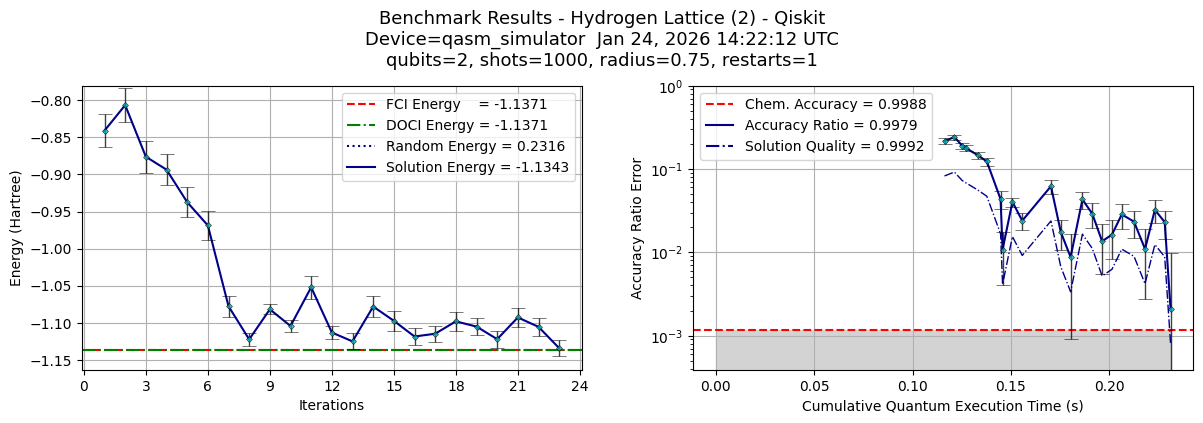

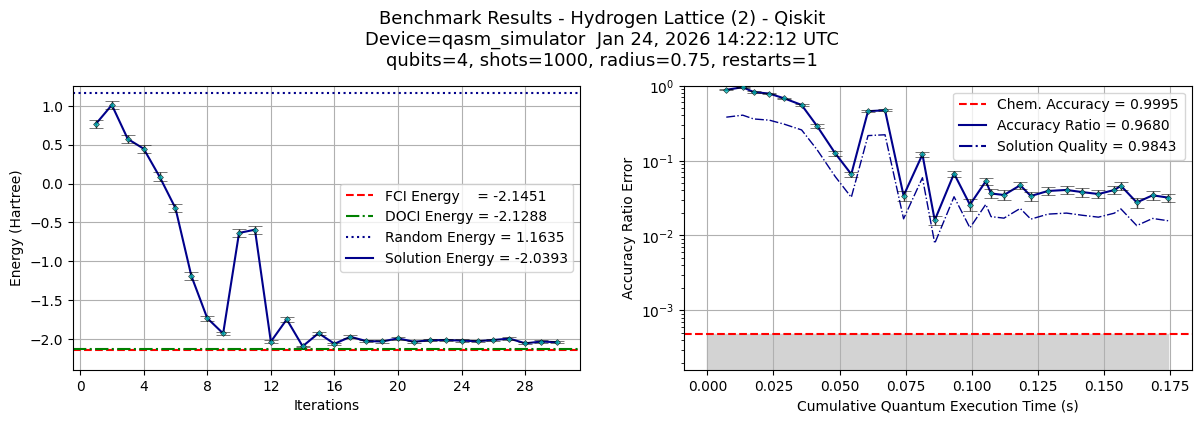

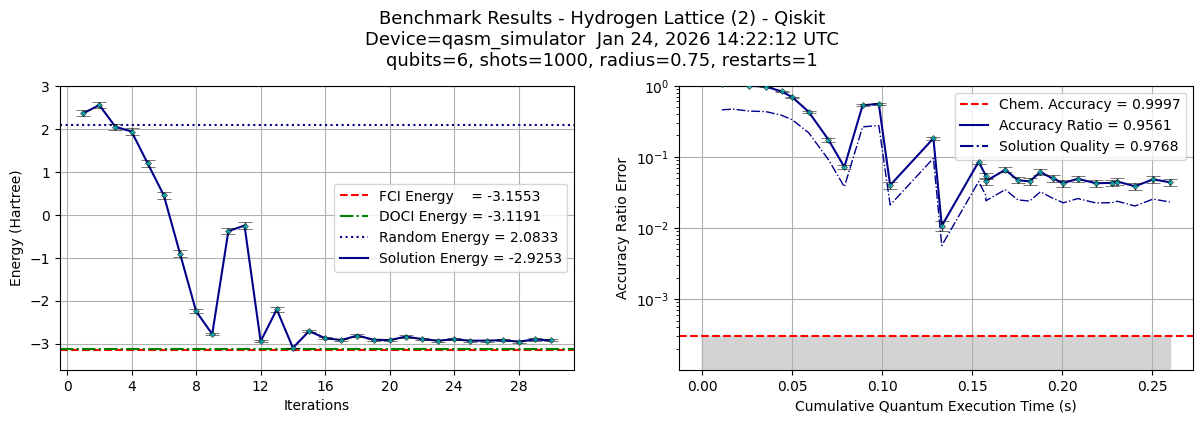

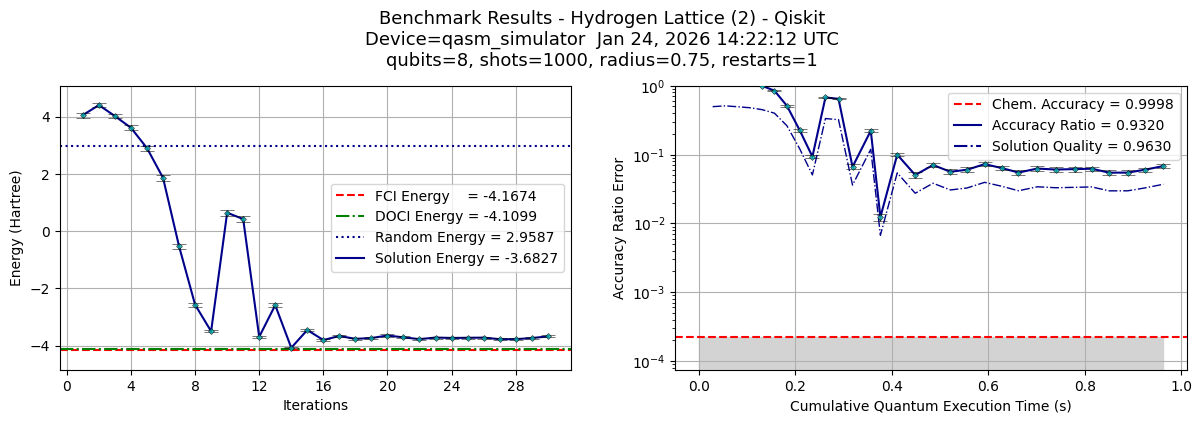

----- Cumulative Plots for all qubit groups -----


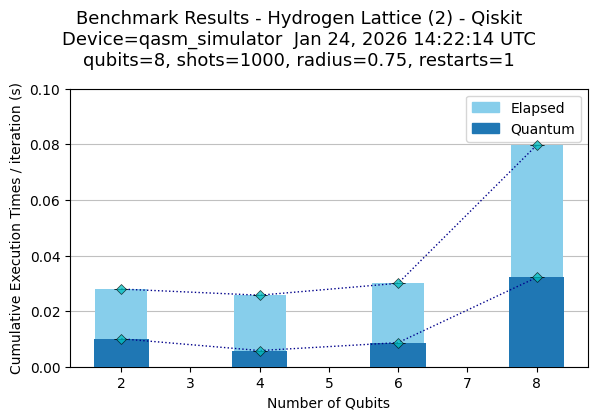

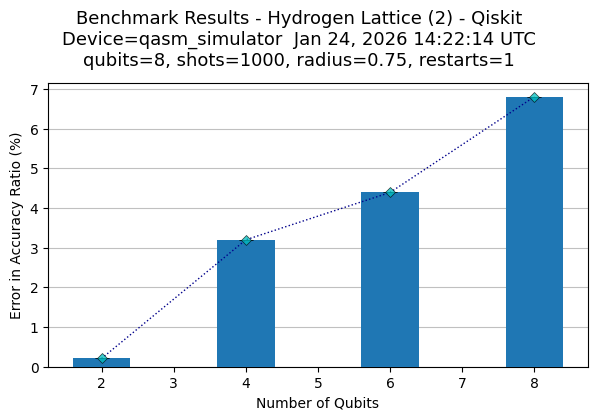

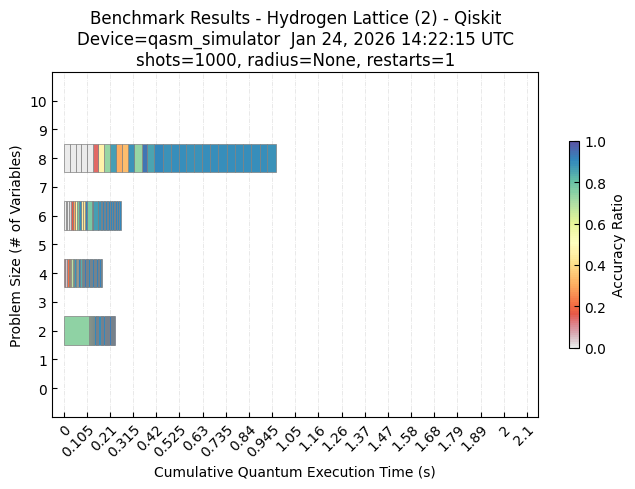

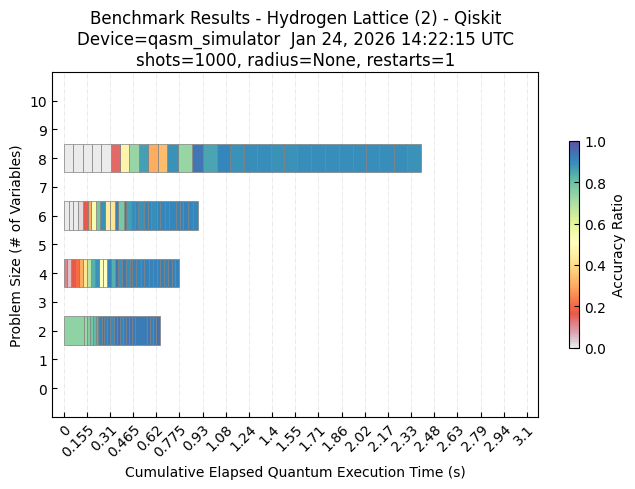

In [6]:
import sys
sys.path.insert(1, "hydrogen_lattice/qiskit")
import hydrogen_lattice_benchmark

# define a custom Nelder-Mead minimizer function
from scipy.optimize import minimize

tol=0.01
max_iter=30

def my_minimizer(objective_function, initial_parameters, callback):

    ret = minimize(objective_function,
        x0=initial_parameters, 

        
        # a custom minimizer 
        method='nelder-mead',
        options={'xatol':tol, 'fatol':tol, 'maxiter': max_iter, 'maxfev': max_iter, 'disp': False},
                   
        callback=callback) 
    
    print(f"\n... my_minimizer completed, return = \n{ret}")
    return ret

# Additional arguments specific to Hydrogen Lattice benchmark method 2
hl_app_args = dict(   

    max_iter=30,                # maximum minimizer iterations to perform
    comfort=True,               # show 'comfort dots' during execution
   
    minimizer_function=my_minimizer,   # use custom minimizer function
)

# Run the benchmark in method 2
hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args
)

### Hydrogen Lattice - Execute Objective Function

This example shows how to perform a single execution of the objective function to obtain the energy computed for a specific set of parameters.
Be sure to execute the first cell to set the backend arguments, or set them here.

In [7]:
import sys
sys.path.insert(1, "hydrogen_lattice/qiskit")
import hydrogen_lattice_benchmark
 
# Arguments specific to execution of single instance of the Hydrogen Lattice objective function
hl_app_args = dict(

    num_qubits=4,               # problem size, dexscribed by number of qubits
    num_shots=1000,             # number of shots to perform
    
    radius=1.0,                # select single problem radius, None = use first radius   
    
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    thetas_array=[ 0.0 ],       # use custom thetas_array
    
    backend_id=backend_id,
    provider_backend=provider_backend,
    hub=hub, group=group,
    project=project, exec_options=exec_options,
)

# Execute the objective function once with the given arguments
energy, key_metrics = hydrogen_lattice_benchmark.run_objective_function(**hl_app_args)

# Print the return value of energy
print(f"Final Energy value = {energy}")

# Print key metrics from execution
print(f"Key Metrics = {key_metrics}")


Hydrogen Lattice (2) Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Jan 24, 2026 14:22:16 UTC
************
Executing [1] restarts for num_qubits = 4
Classically Computed Energies from solution file for 4 qubits and radius 1.0
  DOCI calculated energy : -2.1339866470704942
  FCI calculated energy : -2.166387448634783
  Hartree-Fock calculated energy : -2.098545936997718
  Random Solution calculated energy : 0.16733428141986614
Computed Energies for 4 qubits and radius 1.0
  Solution Energy : -2.106162664667605
  Accuracy Ratio : 0.9741936739108275, Solution Quality : 0.9911516706319999
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 2, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.003, 0.025, 0.006 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, No

### Hydrogen Lattice - Execute Multiple Restarts

This example shows how to perform multiple restarts of benchmark method (2) in order to generate statistics for results.
Be sure to execute the first cell to set the backend arguments, or set them here.

Hydrogen Lattice (2) Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Jan 24, 2026 14:22:21 UTC
************
Executing [4] restarts for num_qubits = 2

.................

..................

................

.................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.023, 0.008 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0, 0

************
Executing [4] restarts for num_qubits = 4

................

...................

................

................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 14, 0.267, 8.0
Averag

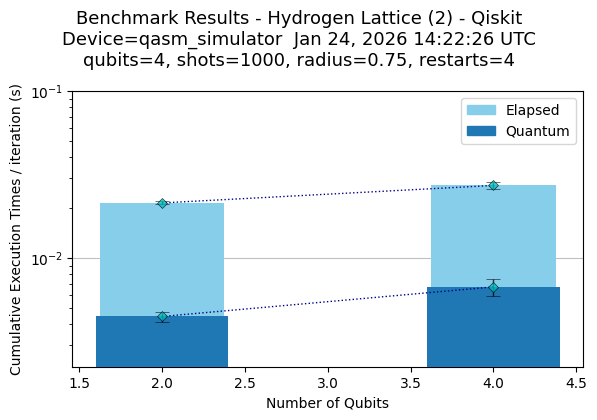

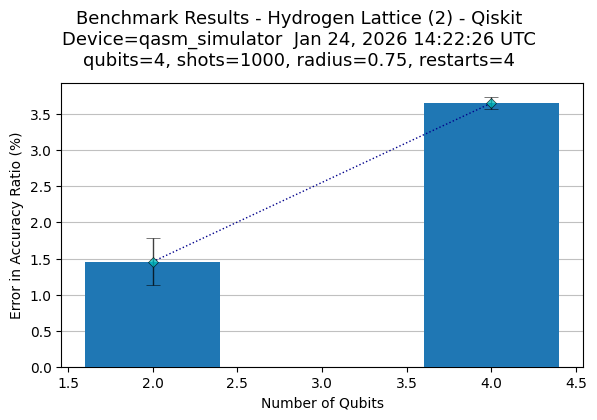

In [8]:
import sys
sys.path.insert(1, "hydrogen_lattice/qiskit")
import hydrogen_lattice_benchmark

# Arguments specific to Hydrogen Lattice benchmark method (2)
hl_app_args = dict(
    
    min_qubits=2,               # configure min, max widths, and shots here
    max_qubits=4,
    num_shots=1000,
    
    max_circuits=4,             # number of 'restarts' to perform at same radius
    
    radius=0.75,                # select single problem radius for multiple execution of same circuit
  
    thetas_array=None,          # specify a custom thetas_array
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    parameterized=False,        # use Parameter objects in circuit, cache transpiled circuits for performance
    
    max_iter=30,                # maximum minimizer iterations to perform
    minimizer_tolerance=0.001,  # tolerance passed to the minimizer
    comfort=True,               # show 'comfort dots' during execution
    
    # disable print of results at every iteration
    show_results_summary=False,
    
    # display options for bar plots (exec time, accuracy ratio)
    bar_y_metrics=["average_exec_times", "accuracy_ratio_error"],
    bar_x_metrics=["num_qubits"],
    use_logscale_for_times=True,                                  # use log scale for cumulative exec time bar chart
    show_elapsed_times=True,                                      # include elapsed time in average_exec_times plot
    
    # disable options for line plots and area plots
    line_y_metrics=None,
    score_metric=None, 
)

# Run the benchmark in method 2
hydrogen_lattice_benchmark.run(method=2, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)